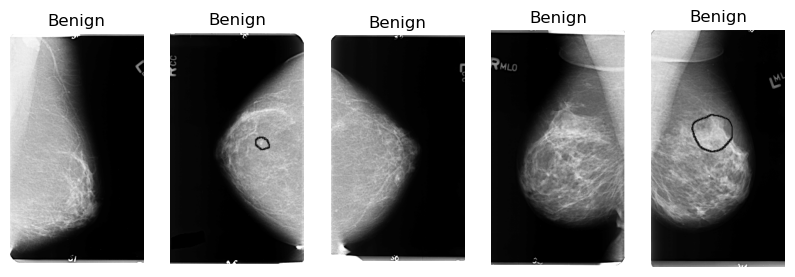

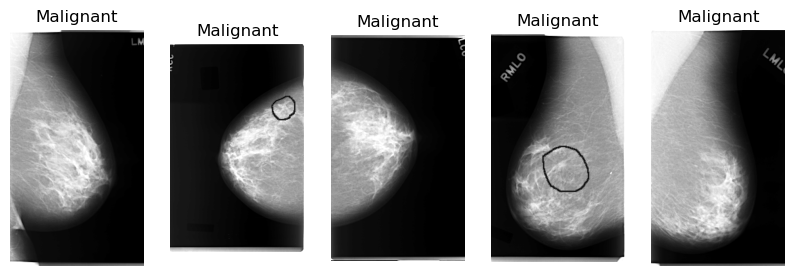

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

def load_images_from_folder(folder, label):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append((img, label))
    return images

benign_images = load_images_from_folder("C:\\Users\\ASUS\\Downloads\\Dataset\\Dataset\\Benign", label=0)
malignant_images = load_images_from_folder("C:\\Users\\ASUS\\Downloads\\Dataset\\Dataset\\Malignant", label=1)

# Show sample images
def show_samples(images, title):
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(f"{title}")
        plt.axis('off')
    plt.show()

show_samples(benign_images, "Benign")
show_samples(malignant_images, "Malignant")


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    rescale=1./255
)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,906,945 (91.20 MB)

 Trainable params: 23,906,945 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import os
import cv2
import numpy as np

def generate_dummy_masks(image_dir, mask_dir, threshold=200):
    os.makedirs(mask_dir, exist_ok=True)
    
    for cls in ['benign', 'malignant']:
        cls_img_dir = os.path.join(image_dir, cls)
        cls_mask_dir = os.path.join(mask_dir, cls)
        os.makedirs(cls_mask_dir, exist_ok=True)

        for img_file in os.listdir(cls_img_dir):
            if not img_file.endswith('.png'):
                continue
            img_path = os.path.join(cls_img_dir, img_file)
            mask_path = os.path.join(cls_mask_dir, img_file.replace('.png', '_mask.png'))

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            # Simple threshold-based dummy mask
            _, mask = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

            # Optional: Morphological ops to refine
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

            cv2.imwrite(mask_path, mask)
            print(f"Saved mask: {mask_path}")


In [7]:
generate_dummy_masks(
    image_dir=r'C:\Users\ASUS\Downloads\Dataset\Dataset',
    mask_dir=r'C:\Users\ASUS\Downloads\Dataset\Masks'
)

Saved mask: C:\Users\ASUS\Downloads\Dataset\Masks\benign\142_B_3124_1.LEFT_MLO.LJPEG.1_highpass_mask.png
Saved mask: C:\Users\ASUS\Downloads\Dataset\Masks\benign\143_B_3124_1.RIGHT_CC.LJPEG.1_highpass_mask.png
Saved mask: C:\Users\ASUS\Downloads\Dataset\Masks\benign\144_B_3124_1.LEFT_CC.LJPEG.1_highpass_mask.png
Saved mask: C:\Users\ASUS\Downloads\Dataset\Masks\benign\145_B_3125_1.RIGHT_MLO.LJPEG.1_highpass_mask.png
Saved mask: C:\Users\ASUS\Downloads\Dataset\Masks\benign\146_B_3125_1.LEFT_MLO.LJPEG.1_highpass_mask.png
Saved mask: C:\Users\ASUS\Downloads\Dataset\Masks\benign\147_B_3125_1.RIGHT_CC.LJPEG.1_highpass_mask.png
Saved mask: C:\Users\ASUS\Downloads\Dataset\Masks\benign\148_B_3125_1.LEFT_CC.LJPEG.1_highpass_mask.png
Saved mask: C:\Users\ASUS\Downloads\Dataset\Masks\benign\149_B_3126_1.RIGHT_MLO.LJPEG.1_highpass_mask.png
Saved mask: C:\Users\ASUS\Downloads\Dataset\Masks\benign\150_B_3126_1.LEFT_MLO.LJPEG.1_highpass_mask.png
Saved mask: C:\Users\ASUS\Downloads\Dataset\Masks\benig

In [8]:
class SegmentationDataGenerator(Sequence):
    def __init__(self, image_root, mask_root, batch_size=8, img_size=(256, 256)):
        self.img_paths = []
        self.mask_paths = []
        self.img_size = img_size
        self.batch_size = batch_size

        for cls in ['benign', 'malignant']:
            img_cls_dir = os.path.join(image_root, cls)
            mask_cls_dir = os.path.join(mask_root, cls)

            for f in os.listdir(img_cls_dir):
                if f.endswith('.png'):
                    self.img_paths.append(os.path.join(img_cls_dir, f))
                    self.mask_paths.append(os.path.join(mask_cls_dir, f.replace('.png', '_mask.png')))

        if not self.img_paths:
            raise ValueError("No image-mask pairs found.")

    def __len__(self):
        return len(self.img_paths) // self.batch_size

    def __getitem__(self, idx):
        batch_img_paths = self.img_paths[idx*self.batch_size:(idx+1)*self.batch_size]
        batch_mask_paths = self.mask_paths[idx*self.batch_size:(idx+1)*self.batch_size]

        imgs, masks = [], []
        for img_path, mask_path in zip(batch_img_paths, batch_mask_paths):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            if img is None or mask is None:
                continue

            img = cv2.resize(img, self.img_size) / 255.0
            mask = cv2.resize(mask, self.img_size) / 255.0

            imgs.append(img[..., np.newaxis])
            masks.append(mask[..., np.newaxis])

        return np.array(imgs), np.array(masks)


In [9]:
train_gen = SegmentationDataGenerator(
    image_root=r'C:\Users\ASUS\Downloads\Dataset\Dataset',
    mask_root=r'C:\Users\ASUS\Downloads\Dataset\Masks',
    batch_size=8
)

model = build_unet((256, 256, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_gen, epochs=10)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.7205 - loss: 0.5675
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.8974 - loss: 0.2226
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.9177 - loss: 0.1516
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.9113 - loss: 0.1344
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.8499 - loss: 0.1916
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.9222 - loss: 0.1265
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.9460 - loss: 0.1100
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - accuracy: 0.9515 - loss: 0.0893
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - accuracy: 0.9650 - loss: 0.0593
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.9673 - loss: 0.0521


In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [11]:
def extract_tumor_mask(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Detect red outline
    lower_red1 = np.array([0, 70, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 70, 50])
    upper_red2 = np.array([180, 255, 255])
    mask_red = cv2.inRange(hsv, lower_red1, upper_red1) + cv2.inRange(hsv, lower_red2, upper_red2)

    if np.sum(mask_red) > 1000:
        contours, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        filled_mask = np.zeros_like(mask_red)
        cv2.drawContours(filled_mask, contours, -1, 255, thickness=cv2.FILLED)
        return cv2.resize(filled_mask, (256, 256)) // 255

    # Fallback: Intensity threshold
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
    return cv2.resize(mask, (256, 256)) // 255

def create_all_masks(image_dir, mask_dir):
    os.makedirs(mask_dir, exist_ok=True)
    for category in ['benign', 'malignant']:
        input_folder = os.path.join(image_dir, category)
        output_folder = os.path.join(mask_dir, category)
        os.makedirs(output_folder, exist_ok=True)

        for filename in os.listdir(input_folder):
            if not filename.endswith('.png'):
                continue
            img_path = os.path.join(input_folder, filename)
            mask = extract_tumor_mask(img_path)
            if mask is not None:
                out_path = os.path.join(output_folder, filename)
                cv2.imwrite(out_path, mask * 255)


In [12]:
create_all_masks(
    image_dir=r'C:\Users\ASUS\Downloads\Dataset\Dataset',
    mask_dir=r'C:\Users\ASUS\Downloads\Dataset\Masks'
)

In [13]:
class SegmentationDataGenerator(Sequence):
    def __init__(self, image_root, mask_root, batch_size=4, target_size=(256, 256)):
        self.image_paths = []
        self.mask_paths = []
        self.batch_size = batch_size
        self.target_size = target_size

        for cls in ['benign', 'malignant']:
            img_dir = os.path.join(image_root, cls)
            mask_dir = os.path.join(mask_root, cls)
            for file in os.listdir(img_dir):
                if file.endswith('.png'):
                    self.image_paths.append(os.path.join(img_dir, file))
                    self.mask_paths.append(os.path.join(mask_dir, file))

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, idx):
        batch_x = self.image_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.mask_paths[idx * self.batch_size:(idx + 1) * self.batch_size]

        imgs = []
        masks = []

        for img_path, mask_path in zip(batch_x, batch_y):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, self.target_size) / 255.0
            mask = cv2.resize(mask, self.target_size) / 255.0
            imgs.append(np.expand_dims(img, axis=-1))
            masks.append(np.expand_dims(mask, axis=-1))

        return np.array(imgs), np.array(masks)

    def show_batch(self, idx=0):
        imgs, masks = self[idx]
        fig, axes = plt.subplots(len(imgs), 2, figsize=(6, 3 * len(imgs)))
        for i in range(len(imgs)):
            axes[i, 0].imshow(imgs[i].squeeze(), cmap='gray')
            axes[i, 0].set_title("Image")
            axes[i, 1].imshow(masks[i].squeeze(), cmap='gray')
            axes[i, 1].set_title("Mask")
        plt.tight_layout()
        plt.show()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 303ms/step - accuracy: 0.7317 - loss: 0.6822 - val_accuracy: 0.8734 - val_loss: 0.5373
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.8530 - loss: 0.4632 - val_accuracy: 0.8953 - val_loss: 0.2295
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8247 - loss: 0.3531 - val_accuracy: 0.7991 - val_loss: 0.2944
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.7878 - loss: 0.3192 - val_accuracy: 0.9391 - val_loss: 0.2290
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8815 - loss: 0.2687 - val_accuracy: 0.8245 - val_loss: 0.2649
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.8226 - loss: 0.2838 - val_accuracy: 0.8384 - val_loss: 0.2466
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8263 - loss: 0.2751 - val_accuracy: 0.8746 - val_loss: 0.2287
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8950 - loss: 0.2323 - val_accuracy: 0.9516 - val_loss:

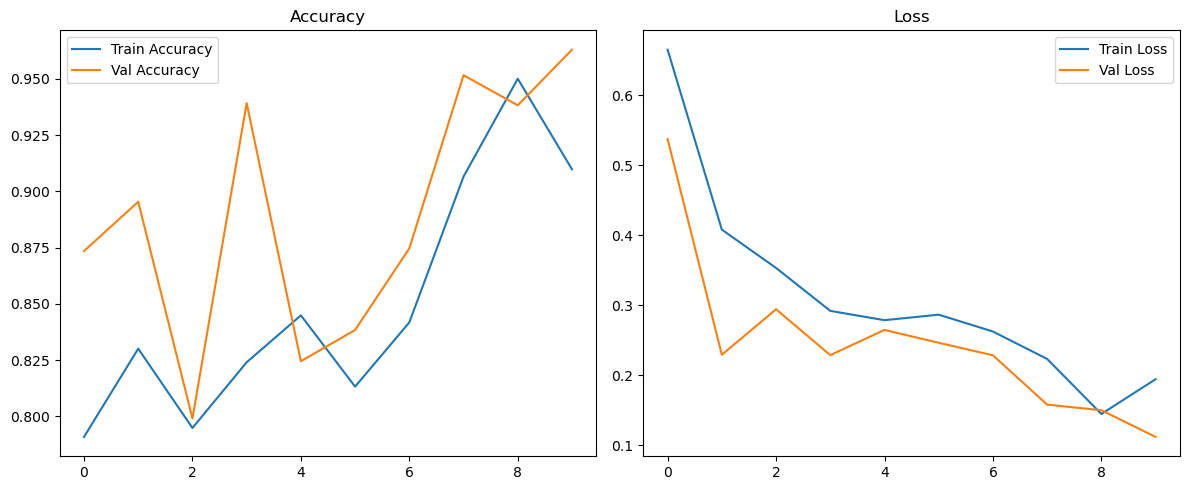

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


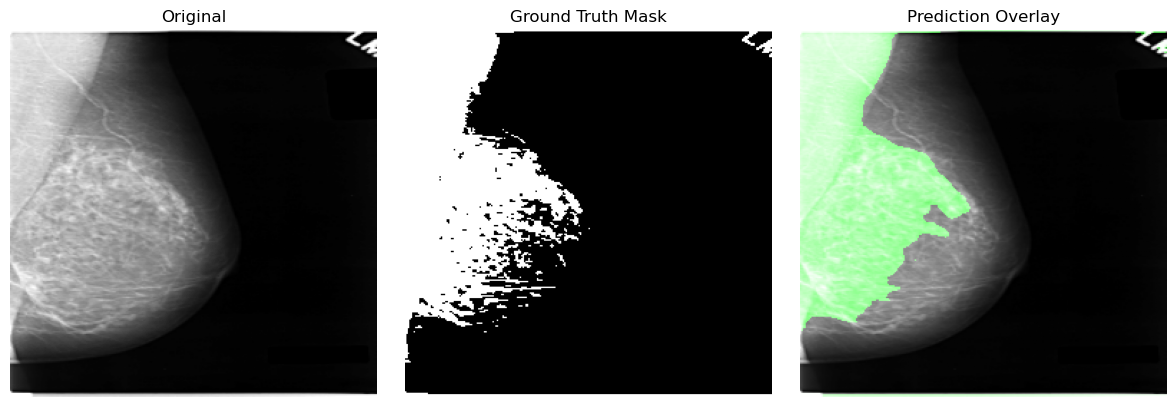

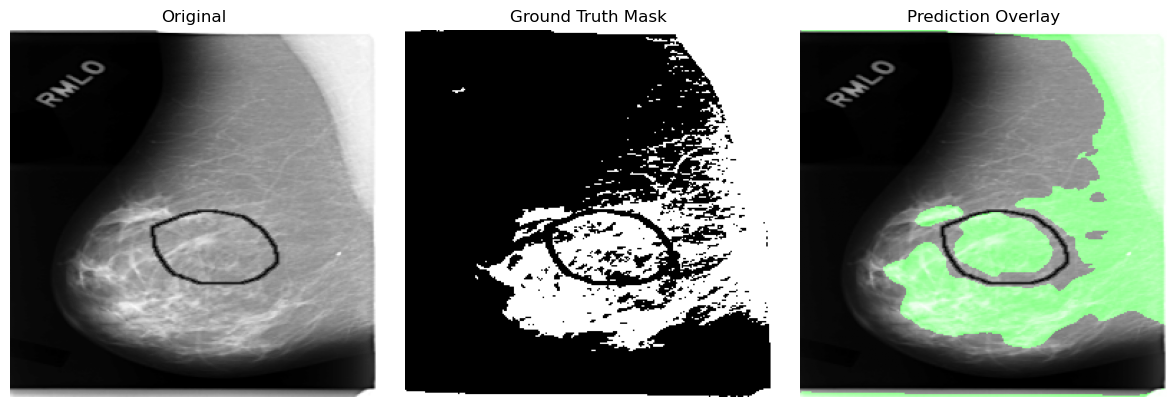

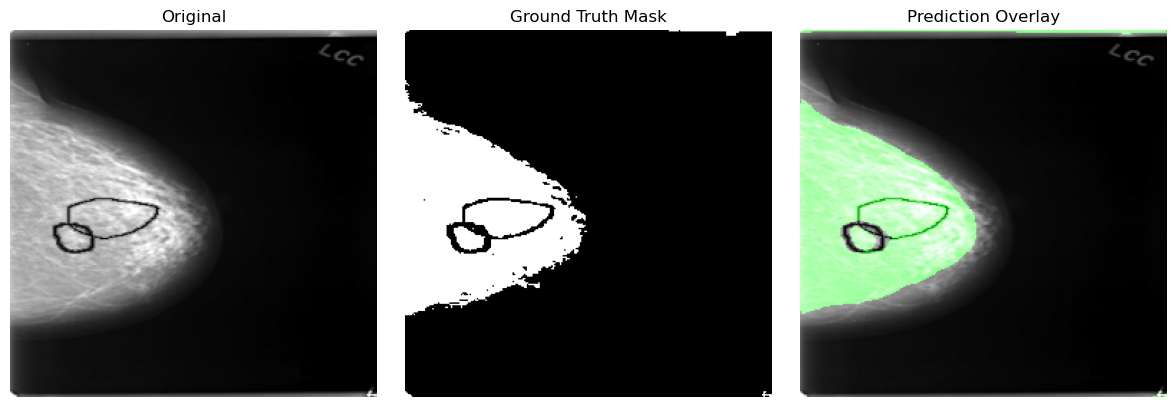

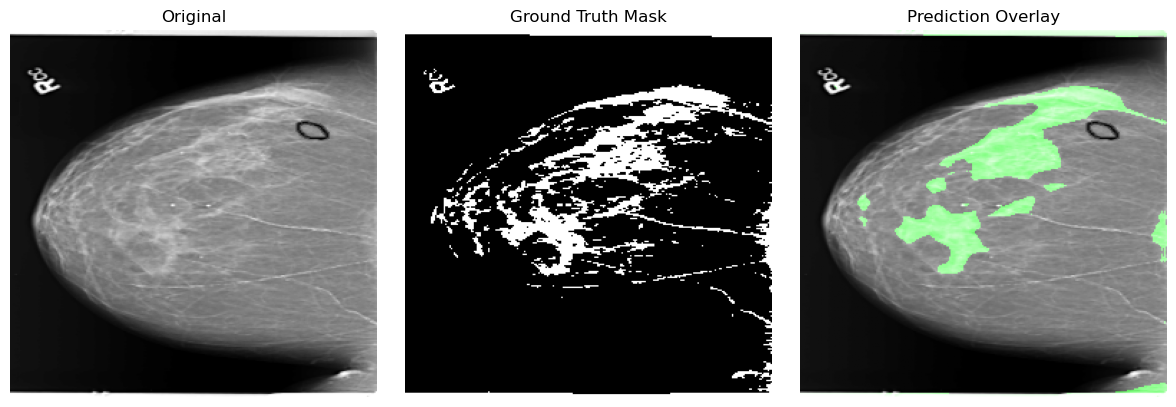

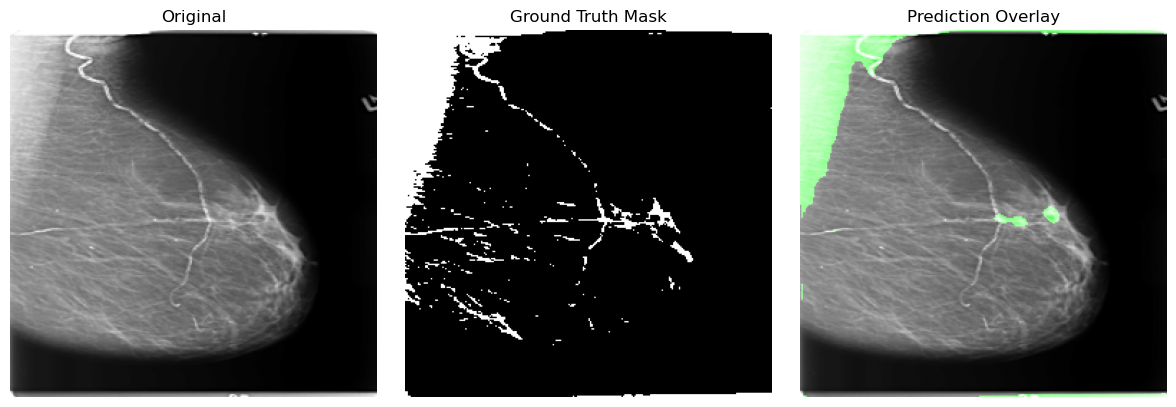

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.optimizers import Adam

# Set the dataset path
DATASET_DIR = r"C:\Users\ASUS\Downloads\Dataset\Dataset"

# Image size
IMG_HEIGHT = 256
IMG_WIDTH = 256

# Load images and generate dummy masks if needed
def load_data():
    images = []
    masks = []
    for label in ['benign', 'malignant']:
        folder = os.path.join(DATASET_DIR, label)
        for filename in os.listdir(folder):
            if filename.endswith(".png"):
                img_path = os.path.join(folder, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
                img = img / 255.0
                images.append(img)
                # Create dummy mask by thresholding
                _, mask = cv2.threshold(img, 0.6, 1.0, cv2.THRESH_BINARY)
                masks.append(mask)
    return np.array(images), np.array(masks)

images, masks = load_data()
images = images[..., np.newaxis]
masks = masks[..., np.newaxis]

# Split dataset into train, val, test
X_temp, X_test, y_temp, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 0.125 x 0.8 = 0.1

# Data generator
class DataGenerator(Sequence):
    def __init__(self, images, masks, batch_size=8):
        self.images = images
        self.masks = masks
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.images) / self.batch_size))

    def __getitem__(self, index):
        batch_images = self.images[index * self.batch_size:(index + 1) * self.batch_size]
        batch_masks = self.masks[index * self.batch_size:(index + 1) * self.batch_size]
        return batch_images, batch_masks

# U-Net model
def build_unet(input_shape):
    inputs = Input(shape=input_shape)
    
    c1 = Conv2D(16, 3, activation='relu', padding='same')(inputs)
    c1 = Conv2D(16, 3, activation='relu', padding='same')(c1)
    p1 = MaxPooling2D()(c1)

    c2 = Conv2D(32, 3, activation='relu', padding='same')(p1)
    c2 = Conv2D(32, 3, activation='relu', padding='same')(c2)
    p2 = MaxPooling2D()(c2)

    c3 = Conv2D(64, 3, activation='relu', padding='same')(p2)
    c3 = Conv2D(64, 3, activation='relu', padding='same')(c3)

    u1 = UpSampling2D()(c3)
    u1 = Concatenate()([u1, c2])
    c4 = Conv2D(32, 3, activation='relu', padding='same')(u1)
    c4 = Conv2D(32, 3, activation='relu', padding='same')(c4)

    u2 = UpSampling2D()(c4)
    u2 = Concatenate()([u2, c1])
    c5 = Conv2D(16, 3, activation='relu', padding='same')(u2)
    c5 = Conv2D(16, 3, activation='relu', padding='same')(c5)

    outputs = Conv2D(1, 1, activation='sigmoid')(c5)
    
    model = Model(inputs, outputs)
    return model

# Prepare model and data generators
train_gen = DataGenerator(X_train, y_train)
val_gen = DataGenerator(X_val, y_val)
test_gen = DataGenerator(X_test, y_test)

model = build_unet((IMG_HEIGHT, IMG_WIDTH, 1))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_gen)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

# Display predictions with masks and overlays
def show_predictions(model, images, masks, num=5):
    preds = model.predict(images[:num])
    for i in range(num):
        original = images[i].squeeze()
        ground_truth = masks[i].squeeze()
        predicted = preds[i].squeeze()

        # Threshold prediction
        predicted_mask = (predicted > 0.5).astype(np.uint8)

        # Overlay predicted mask on original image
        overlay = np.stack([original]*3, axis=-1)
        overlay[:, :, 1] += predicted_mask * 0.5  # Green overlay

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.title("Original")
        plt.imshow(original, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title("Ground Truth Mask")
        plt.imshow(ground_truth, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title("Prediction Overlay")
        plt.imshow(overlay)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

# Show predictions on test set
show_predictions(model, X_test, y_test, num=5)
